# Güzide Nur Demir / 215150432
# Assignment 3


In [149]:
from __future__ import print_function, division

import nsfg
import matplotlib
import thinkstats2
import thinkplot

In [108]:
resp=nsfg.ReadFemResp()

In [109]:
resp.head()

,caseid,rscrinf,rdormres,rostscrn,rscreenhisp,rscreenrace,age_a,age_r,cmbirth,agescrn,...,pubassis_i,basewgt,adj_mod_basewgt,finalwgt,secu_r,sest,cmintvw,cmlstyr,screentime,intvlngth
0,2298,1,5,5,1,5.0,27,27,902,27,...,0,3247.916977,5123.759559,5556.717241,2,18,1234,1222,18:26:36,110.492667
1,5012,1,5,1,5,5.0,42,42,718,42,...,0,2335.279149,2846.799490,4744.191350,2,18,1233,1221,16:30:59,64.294000
2,11586,1,5,1,5,5.0,43,43,708,43,...,0,2335.279149,2846.799490,4744.191350,2,18,1234,1222,18:19:09,75.149167
3,6794,5,5,4,1,5.0,15,15,1042,15,...,0,3783.152221,5071.464231,5923.977368,2,18,1234,1222,15:54:43,28.642833
4,616,1,5,4,1,5.0,20,20,991,20,...,0,5341.329968,6437.335772,7229.128072,2,18,1233,1221,14:19:44,69.502667


In [110]:
timesmar_col=resp["timesmar"]
mean1, std1 = timesmar_col.mean(), timesmar_col.std()
mean1, std1  #(1.387057682985943, 4.297113023252983)

(1.387057682985943, 4.297113023252983)

In [111]:
jintendn_col=resp["jintendn"]
mean2, std2 = jintendn_col.mean(), jintendn_col.std()
mean2, std2   #(2.7052556818181817, 9.710108051456992)

(2.7052556818181817, 9.710108051456992)

In [112]:
pdf=thinkstats2.NormalPdf(mean1,std1)
pdf.Density(mean1 + std1)  #0.05631006752900525

0.05631006752900525

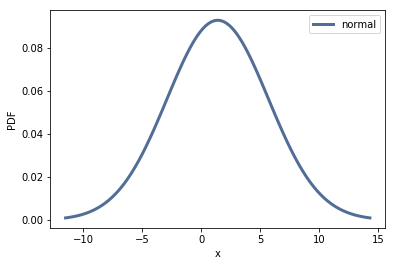

In [113]:
thinkplot.Pdf(pdf, label='normal')
thinkplot.Config(xlabel='x', ylabel='PDF')

In [114]:
pdf=thinkstats2.NormalPdf(mean2,std2)
pdf.Density(mean2 + std2)  #0.0249194677584289

0.0249194677584289

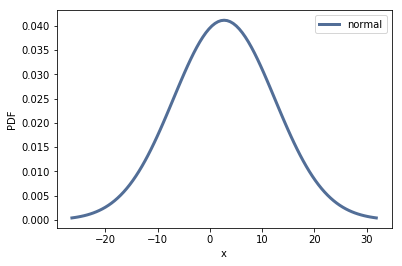

In [115]:
thinkplot.Pdf(pdf, label='normal')
thinkplot.Config(xlabel='x', ylabel='PDF')

In [116]:
pdf2=thinkstats2.Pdf(mean1,std1)
thinkplot.Pdf(pdf2,label="normal",xlabel="x",ylabel="y")


TypeError: object() takes no parameters

In [ ]:
def RawMoment(xs, k):
    return sum(x**k for x in xs) / len(xs)

In [ ]:
def Mean(xs):
    return RawMoment(xs, 1)

In [117]:
def CentralMoment(xs, k):
    mean = RawMoment(xs, 1)
    sum_list = [(x - mean)**k for x in xs]
    return sum(sum_list) / len(sum_list)

In [118]:
def Var(xs):
    return CentralMoment(xs, 2)

In [119]:
def StandardizedMoment(xs, k):
    var = CentralMoment(xs, 2)
    std = np.sqrt(var)
    return CentralMoment(xs, k) / std**k

In [120]:
def Skewness(xs):
    return StandardizedMoment(xs, 3)
Skewness(timesmar_col.dropna())  #22.219307220678285

22.219307220678285

In [121]:
Skewness(jintendn_col.dropna())  #9.686914057933583

9.686914057933583

In [122]:
def Median(xs):
    cdf = thinkstats2.Cdf(xs)
    return cdf.Value(0.5)

In [123]:
def PearsonMedianSkewness(xs):
    median = Median(xs)
    mean = RawMoment(xs, 1)
    var = CentralMoment(xs, 2)
    std = np.sqrt(var)
    gp = 3 * (mean - median) / std
    return gp
PearsonMedianSkewness(timesmar_col.dropna())  #0.27025442021022084

0.27025442021022084

In [124]:
PearsonMedianSkewness(jintendn_col.dropna())  #0.5270368429720083

0.5270368429720083

In [147]:
def SampleRows(resp, nrows, replace=False):
    indices = np.random.choice(resp.index, nrows, replace=replace)
    print(indices)
    sample = resp.loc[indices]
    return sample

In [126]:
sample = SampleRows(resp, 5000)
mar, part = sample.timesmar, sample.jintendn
sample

[3236 4961 6218 ... 6475 3760  646]


,caseid,rscrinf,rdormres,rostscrn,rscreenhisp,rscreenrace,age_a,age_r,cmbirth,agescrn,...,pubassis_i,basewgt,adj_mod_basewgt,finalwgt,secu_r,sest,cmintvw,cmlstyr,screentime,intvlngth
3236,12485,1,5,4,5,5.0,18,18,1005,18,...,0,2552.431740,2751.268825,4839.206737,2,65,1233,1221,17:26:22,30.187000
4961,6648,1,5,4,5,4.0,30,30,859,30,...,0,2816.825997,3086.525984,4012.792432,2,57,1230,1218,18:32:27,96.023500
6218,12007,1,5,3,1,1.0,31,31,849,31,...,0,2418.276734,3027.466859,3842.158191,1,10,1230,1218,20:21:29,181.114167
2575,11416,1,5,1,5,5.0,36,36,788,36,...,0,2335.997932,3168.802516,5782.747711,1,25,1232,1220,19:36:39,57.770500
1965,7841,1,5,1,5,4.0,37,37,789,37,...,0,1806.275581,2009.876057,3076.115305,1,71,1236,1224,17:07:22,69.530064
3076,3441,5,5,2,5,2.0,31,31,852,31,...,0,3827.870640,4451.987612,7724.198507,1,65,1230,1218,18:55:33,48.252000
738,3742,5,5,2,1,2.0,23,23,951,23,...,0,1167.630654,2107.659026,2366.901087,2,28,1237,1225,17:46:29,74.979667
4271,3549,1,5,1,5,5.0,38,38,776,38,...,0,3409.658996,4526.139953,8259.752800,2,47,1234,1222,16:39:29,92.505667
3452,4869,5,5,2,5,5.0,30,30,867,30,...,0,4503.052790,5779.737348,10027.844298,1,60,1235,1223,16:40:25,57.938167
4565,3927,1,5,3,5,5.0,43,43,716,43,...,0,3195.479319,3934.004568,6556.018612,2,43,1235,1223,14:25:20,95.744333


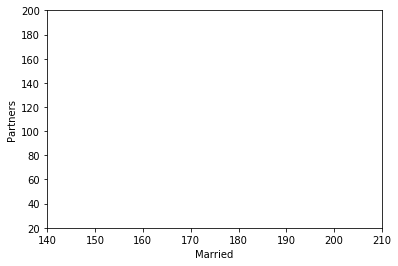

In [148]:
thinkplot.Scatter(mar, part, alpha=0.01,color='Orange')
thinkplot.Config(xlabel='Married',ylabel='Partners',axis=[140, 210, 20, 200],legend=False)

In [142]:
import matplotlib
def Jitter(values, jitter=0.5):
    n = len(values)
    return np.random.normal(0, jitter, n) + values

In [129]:
mar = Jitter(mar, 2)
part = Jitter(part, 2)
mar, part

(3236         NaN
 4961         NaN
 6218         NaN
 2575   -0.535968
 1965         NaN
 3076         NaN
 738          NaN
 4271         NaN
 3452    0.810756
 4565   -2.073306
 2183         NaN
 538     2.682075
 2362         NaN
 934          NaN
 7177         NaN
 5572         NaN
 2538    3.283857
 1076         NaN
 7257    1.951181
 4616    2.583926
 223          NaN
 4728         NaN
 2107   -1.799562
 1839    3.653381
 2933   -1.341062
 1331    2.819928
 3515   -0.085608
 4107         NaN
 6460    4.550292
 3602    2.809115
           ...   
 6572         NaN
 7467         NaN
 5974         NaN
 231          NaN
 7061    3.265888
 130    -0.384038
 3060    1.088124
 492          NaN
 4718    3.441400
 6322         NaN
 5971   -0.996437
 1907    3.330870
 6618         NaN
 2745    1.387349
 2178         NaN
 6611    3.068297
 7109    2.376255
 7168         NaN
 5921   -3.121246
 2368    4.626233
 292          NaN
 3844         NaN
 2172    2.487997
 2011         NaN
 6235    3

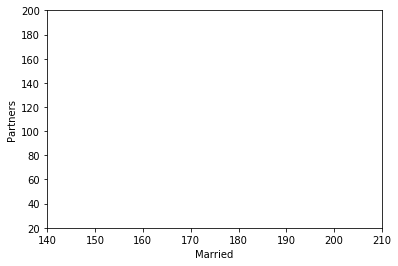

In [143]:
thinkplot.Scatter(mar, part, alpha=0.01)
thinkplot.Config(xlabel='Married',ylabel='Partners'
                 ,axis=[140, 210, 20, 200],
                 legend=False)

In [131]:
cleaned = resp.dropna(subset=['timesmar', 'jintendn'])
cleaned

,caseid,rscrinf,rdormres,rostscrn,rscreenhisp,rscreenrace,age_a,age_r,cmbirth,agescrn,...,pubassis_i,basewgt,adj_mod_basewgt,finalwgt,secu_r,sest,cmintvw,cmlstyr,screentime,intvlngth
11,9200,5,5,3,1,5.0,26,26,923,26,...,0,2418.624283,2754.293339,2987.031126,2,18,1237,1225,14:12:31,61.060667
12,6320,5,5,5,5,1.0,23,23,952,23,...,0,5497.225851,6448.332868,7241.477811,1,18,1236,1224,14:27:20,69.906500
13,11700,1,5,4,1,5.0,34,34,822,34,...,0,3362.448309,3677.062170,4666.559600,1,18,1236,1224,11:35:31,77.493333
29,5656,5,5,3,5,5.0,26,26,921,26,...,0,4170.041867,6582.846660,7139.097203,2,18,1238,1226,11:20:54,61.501000
43,7011,1,5,3,1,5.0,34,34,815,34,...,0,3363.355288,3782.074549,4799.830810,2,83,1233,1221,13:26:28,94.169833
45,7081,5,5,3,1,5.0,35,35,805,35,...,0,5837.228186,6773.516282,7326.912562,2,83,1233,1221,11:40:08,103.980333
48,9242,5,5,2,1,5.0,29,29,888,29,...,0,3363.355288,5310.258519,5758.975364,2,83,1237,1225,12:02:18,69.112833
51,2339,5,5,3,1,5.0,31,31,862,31,...,0,3363.355288,4252.617347,5396.996675,2,83,1236,1224,19:36:49,72.799167
74,8269,1,5,3,5,5.0,24,24,939,24,...,0,2668.984249,3259.635980,4585.329933,1,55,1231,1219,15:07:17,87.511833
81,8081,1,5,4,1,5.0,25,25,929,25,...,0,21524.476994,25524.020313,27680.800029,1,55,1238,1226,19:30:09,118.143000


In [144]:
import matplotlib
bin = np.arange(135, 210, 5)
print(bin)
indices = np.digitize(cleaned.timesmar, bin)
print(indices)
groups = cleaned.groupby(indices)
print(groups)

[135 140 145 150 155 160 165 170 175 180 185 190 195 200 205]
[0 0 0 ... 0 0 0]


In [133]:
for i, group in groups:
    print(i, len(group))

0 1074


In [134]:
mean_mar = [group.timesmar.mean() for i, group in groups]
cdfs = [thinkstats2.Cdf(group.jintendn) for i, group in groups]

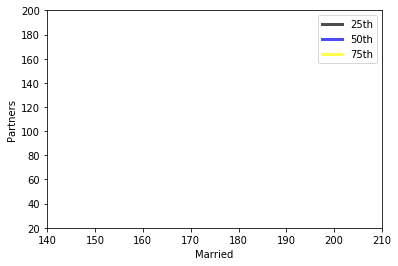

In [145]:
import matplotlib
Colors = ["black","blue","yellow"]
percent = [25, 50, 75]
for i in range(len(percent)):
    weight_percentile = [cdf.Percentile(percent[i]) for cdf in cdfs]
    label = '%dth' % percent[i]
    thinkplot.Plot(mean_mar, weight_percentile, label=label,color=Colors[i])
    
thinkplot.Config(xlabel='Married',
                 ylabel='Partners',
                 axis=[140, 210, 20, 200],
                 legend=True)

In [136]:


import numpy as np
def Cov(xs, ys, meanx=None, meany=None):
    xs = np.asarray(xs)
    ys = np.asarray(ys)

    if meanx is None:
        meanx = np.mean(xs)
    if meany is None:
        meany = np.mean(ys)

    cov = np.dot(xs-meanx, ys-meany) / len(xs)
    return cov


In [137]:
mar, part =cleaned["timesmar"], cleaned["jintendn"]
def Corr(xs, ys):
    xs = np.asarray(xs)
    ys = np.asarray(ys)

    meanx, varx = thinkstats2.MeanVar(xs)
    meany, vary = thinkstats2.MeanVar(ys)

    corr = Cov(xs, ys, meanx, meany) / np.sqrt(varx * vary)
    return corr
Corr(mar,part)  #-0.03652346652385939

-0.03652346652385939

In [138]:
np.corrcoef(mar, part)  #array([[ 1.        , -0.03652347],[-0.03652347,  1.        ]])

array([[ 1.        , -0.03652347],
       [-0.03652347,  1.        ]])

In [139]:
import pandas as pd
def SpearmanCorr(xs, ys):
    xranks = pd.Series(xs).rank()
    yranks = pd.Series(ys).rank()
    return Corr(xranks, yranks)

In [140]:
SpearmanCorr(mar, part) #-0.08337747790348256

-0.08337747790348256

In [102]:
Corr(cleaned.jintendn, np.log(cleaned.timesmar))  #Alternative way to describe that Spearman's correlation is to change either of the factors in a way that makes the relationship nearer to direct, and the process Pearson's correlation.

-0.037662435739761434